In [162]:
import main as m
from importlib import reload

In [163]:
reload(m)

<module 'main' from '/Users/santiagoarmstrong/Documents/GitHub/carpuzzle/main.py'>

In [164]:
# initialize the solver using the optimal strategy
strategy = [(1,1), (0,1), (1,0), (1,2), (2,1), (0,0), (0,2) , (2,0), (2,2)]
solver = m.Recursive(strategy,path = "data.tsv", shape=(3,3))

In [165]:
# run
solver.depth_search()

True

In [166]:
print(solver.board)
solver.board.print_ids()
solver.board.is_compatible_board()

  GF    BF    YF  
YF  GBGF  BBBF  RB
  RF    RB    YB  
  RB    RF    YF  
GF  BFBB  GFGB  BF
  YF    YB    RB  
  YB    YF    RF  
RB  BBBF  GBGF  BF
  GB    RB    YB  

2,3,0
5,4,1
8,6,7



True

In [167]:
pi = [solver.board.array[i,j].id for i in range(3) for j in range (3)]
orientations = [solver.board.array[i,j].orientation for i in range(3) for j in range (3)]

In [171]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from scipy import ndimage


In [172]:
def img_reshape(i):
    img = Image.open('individual/'+str(i)+".png").convert('RGB')
    img = img.resize((300,300))
    img = np.asarray(img)
    return img
    
img_arr = [img_reshape(i) for i in range(9)]

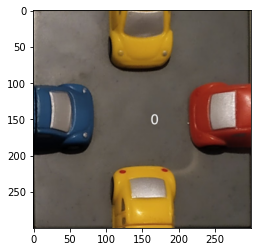

In [173]:
plt.imshow(np.asarray( img_arr[0]))

position  0 0 image 2 orientation 180
position  0 1 image 3 orientation 0
position  0 2 image 0 orientation 0
position  1 0 image 5 orientation 180
position  1 1 image 4 orientation 0
position  1 2 image 1 orientation 0
position  2 0 image 8 orientation 0
position  2 1 image 6 orientation 0
position  2 2 image 7 orientation 0


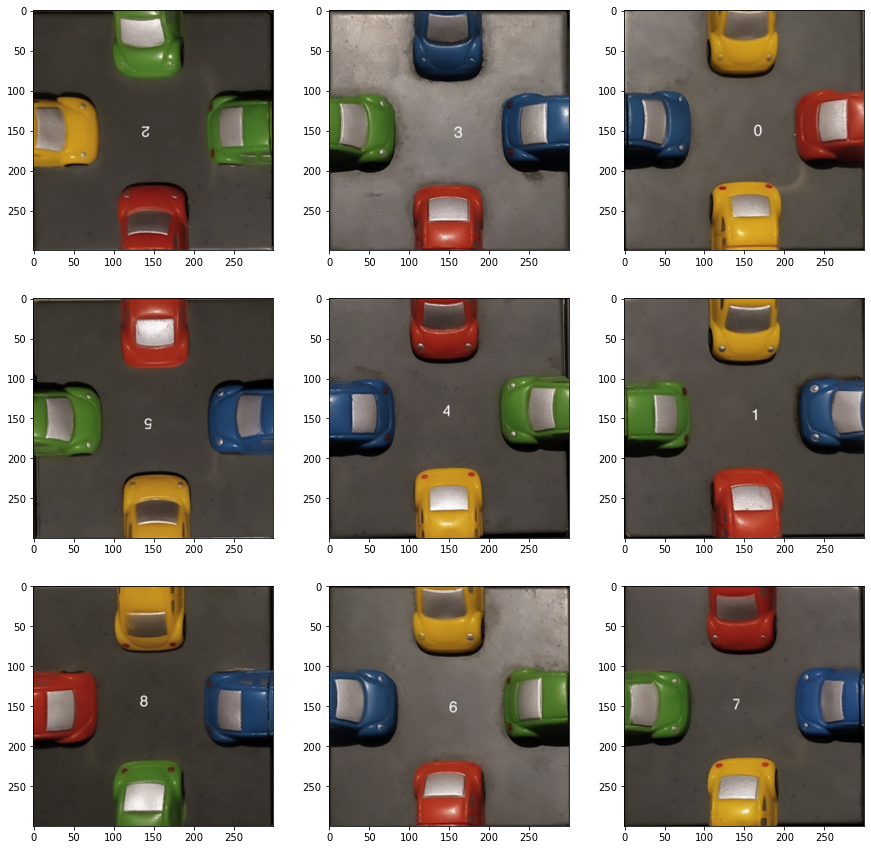

In [174]:
rows = 3
cols = 3
img_count = 0


fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))

for i in range(rows):
    for j in range(cols):
        
        # obtain the angle and the image
        degree =  - 90 + 90 * orientations[img_count]
        im_id = pi[img_count]

        rotated_img = ndimage.rotate(img_arr[im_id], degree)      
        axes[i, j].imshow(rotated_img)
        
        print("position ", i, j, "image", im_id, "orientation", degree)
        img_count+=1